In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

Nesse notebook, será construído uma rede neural com o Pytorch que consegue reconhecer as imagens dos números do conjunto de dados [MNIST](https://en.wikipedia.org/wiki/MNIST_database).

#### Definições de parâmetros

In [18]:
INPUT_SIZE = 784        # Número de pixeis na imagem (28 x 28)
OUTPUT_SIZE = 10        # Número de classes (0, 1, 2, ...9) 

#### Visualizando a vetorização da entrada
![SegmentLocal](Imagens/mnist_pytorch_3b1b_28x28.gif "segment")

##### Definições de Hiperpârametros

In [19]:
LEARNING_RATE = 0.005   # Taxa de aprendizado da rede
EPOCHS = 10             # Quantos vezes a rede passa pelo conjunto de dados
BATCH_SIZE = 64         # Número de imagens passados para rede de uma só vez
HIDDEN_SIZE = 64        # Número de neurônios nas camadas

##### Definindo a classe da rede neural

In [20]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):   # Definindo as camadas da rede
        super().__init__()                                      
        self.linear1 = nn.Linear(input_size, hidden_size)       # Primeira camada linear
        self.relu1 = nn.ReLU()                                  # Função de ativação da primeira camada
        self.linear2 = nn.Linear(hidden_size, hidden_size)      # Segunda camada linear                     
        self.relu2 = nn.ReLU()                                  # Função de ativação da segunda camada
        self.linear3 = nn.Linear(hidden_size, output_size)      # Camada de saída

    def forward(self, x):                                       # Definindo o foward propagation
        x = torch.flatten(x, start_dim=1)                       # Tranformando a matriz de 28x28 para uma array de 784 elementos
        x = self.linear1(x)                                     # Passando pela primeira camada
        x = self.relu1(x)                                       # Função de ativação da primeira camada
        x = self.linear2(x)                                     # Passando pela segunda camada
        x = self.relu2(x)                                       # Função de ativação da segunda camada
        x = self.linear3(x)                                     # Passando pela última camada
        return x

#### Visualizando a rede neural
![SegmentLocal](Imagens/mnist_pytorch_3b1b.gif "segment")

#### Datasets

In [21]:
mnist_train = MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())      # Imagens de treino (60000)
mnist_test = MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())      # Imagens de teste  (10000)

#### Instanciando objetos

In [22]:
model = NeuralNetwork(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)     # Instanciando a rede
criterion = nn.CrossEntropyLoss()                               # Instanciando a função custo 
optimizer = optim.Adam(model.parameters(), LEARNING_RATE)       # Instanciando a função de otimização

#### Loop de treino

100%|██████████| 10/10 [00:59<00:00,  5.93s/it]


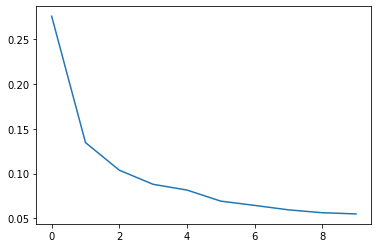

In [23]:
mnist_dataloader = DataLoader(mnist_train, batch_size=BATCH_SIZE, drop_last=True)

losses = []
for epoch in tqdm(range(EPOCHS)):                                   # Iterando o numero de épocas
    total_loss = 0                                                  # Inicializando a variavel do custo
    for image, labels in mnist_dataloader:                          # Iterando cada imagen do dataset de treino
        prediction = model(image)                                   # Forward propagation
        loss = criterion(prediction, labels)                        # Calculando a loss
        total_loss += loss.item()                                   # Atualizando a loss total
        optimizer.zero_grad()                                       # Zerando os gradientes
        loss.backward()                                             # Backpropagation
        optimizer.step()                                            # Atualizando os pessos
    losses.append(total_loss / (len(mnist_train) / BATCH_SIZE))     # Inserindo elentos na lista 
plt.plot(losses)                                                    # Plotando o loss de cada época
plt.show()

#### Loop de testes

In [24]:
mnist_dataloader = DataLoader(mnist_test, batch_size=1, drop_last=True)

with torch.no_grad():
    total_correct = 0                                              # Inicializando a variavel dos acertos
    for image, label in mnist_dataloader:                          # Iterando cada imagen do dataset de teste
        prediction = model(image)                                  # Forward propagation
        index = torch.argmax(prediction)                           # Recebe o numero previsto
        if index == label.item():                                  # Verifica se o numero está certo
            total_correct += 1
    print(f"Percentage of correct answers: {((total_correct*100)/len(mnist_test)):.2f}%")


Percentage of correct answers: 95.70%
